In [1]:
import pandas as pd
import seaborn as sb
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Aemf1.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   City                         41714 non-null  object 
 1   Price                        41714 non-null  float64
 2   Day                          41714 non-null  object 
 3   Room Type                    41714 non-null  object 
 4   Shared Room                  41714 non-null  bool   
 5   Private Room                 41714 non-null  bool   
 6   Person Capacity              41714 non-null  float64
 7   Superhost                    41714 non-null  bool   
 8   Multiple Rooms               41714 non-null  int64  
 9   Business                     41714 non-null  int64  
 10  Cleanliness Rating           41714 non-null  float64
 11  Guest Satisfaction           41714 non-null  float64
 12  Bedrooms                     41714 non-null  int64  
 13  City Center (km)

In [4]:
df.shape

(41714, 19)

In [6]:
df.describe()

,Price,Person Capacity,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
count,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000,41714.000000
mean,260.094423,3.237235,0.295273,0.341180,9.442274,93.103179,1.165939,2.679792,0.603921,293.905990,11.719658,626.692618,25.553590
std,279.408493,1.299459,0.456171,0.474112,0.889173,8.141745,0.638157,1.996684,0.706206,235.750055,8.379161,520.644720,18.484572
min,34.779339,2.000000,0.000000,0.000000,2.000000,20.000000,0.000000,0.015045,0.002301,15.152201,0.926301,19.576924,0.592757
25%,144.016085,2.000000,0.000000,0.000000,9.000000,90.000000,1.000000,1.275913,0.236693,124.371614,5.510735,210.459574,11.132052
50%,203.819274,3.000000,0.000000,0.000000,10.000000,95.000000,1.000000,2.253237,0.391220,228.920599,9.951086,519.583509,21.814414
75%,297.373358,4.000000,1.000000,1.000000,10.000000,98.000000,1.000000,3.584489,0.678702,394.000201,15.467009,860.708156,36.821356
max,18545.450285,6.000000,1.000000,1.000000,10.000000,100.000000,10.000000,25.284557,14.273577,4513.563486,100.000000,6696.156772,100.000000


In [8]:
df['Price'].mode()

0    184.462161
Name: Price, dtype: float64

In [9]:
df['Price'].value_counts()

184.462161     188
161.550511     167
126.715451     162
115.998406     145
138.963748     133
              ... 
1681.050657      1
705.206379       1
693.480300       1
516.885553       1
301.054157       1
Name: Price, Length: 8087, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_12040\4277381046.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sb.heatmap(df.corr(), annot=True)


<Axes: >

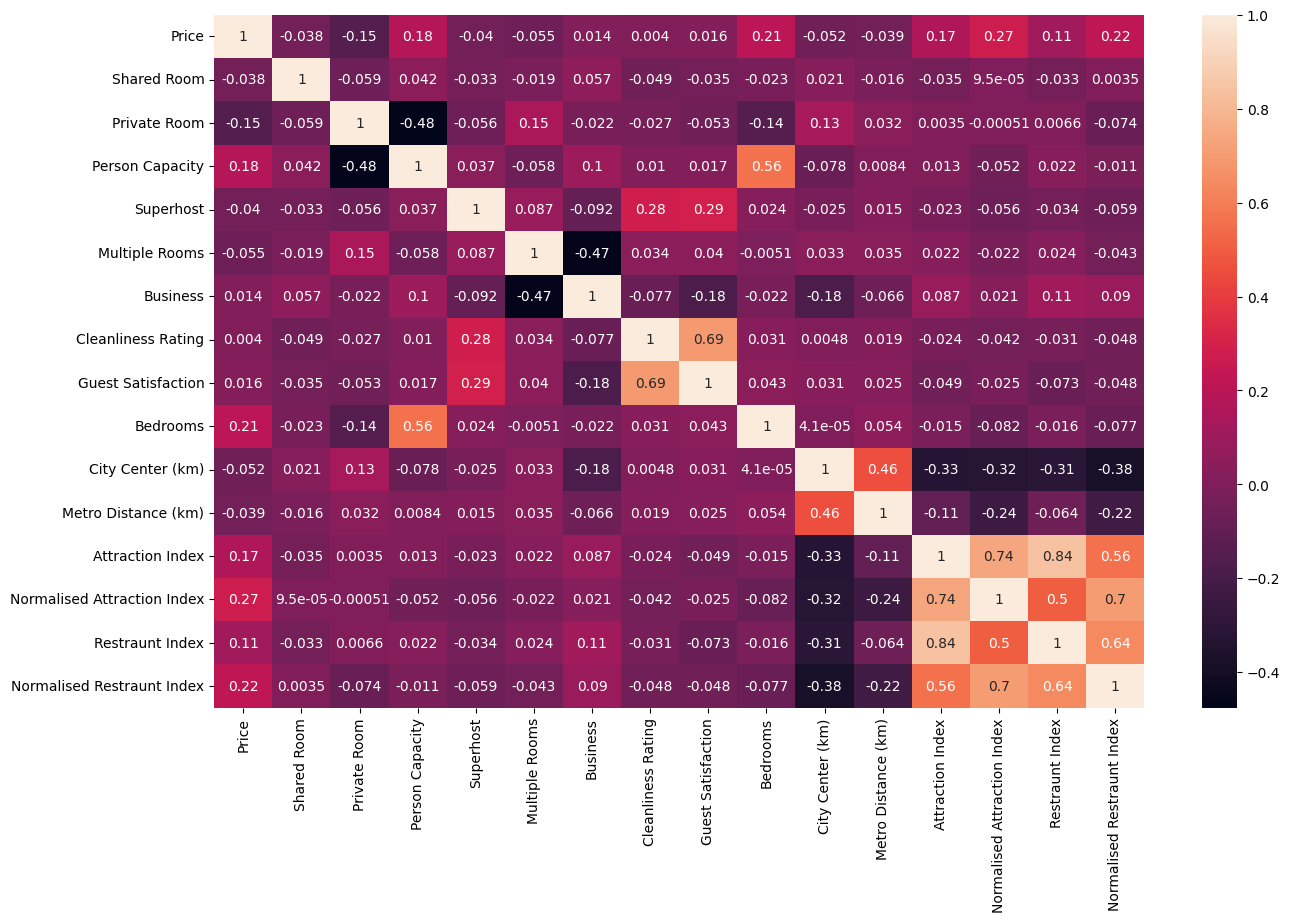

In [10]:
plt.figure(figsize=(15,9))
sb.heatmap(df.corr(), annot=True)


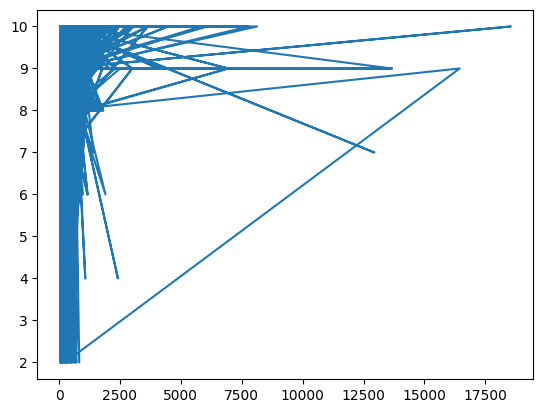

In [53]:
plt.plot(df['Price'], df['Cleanliness Rating'])


<Axes: xlabel='Attraction Index', ylabel='Restraunt Index'>

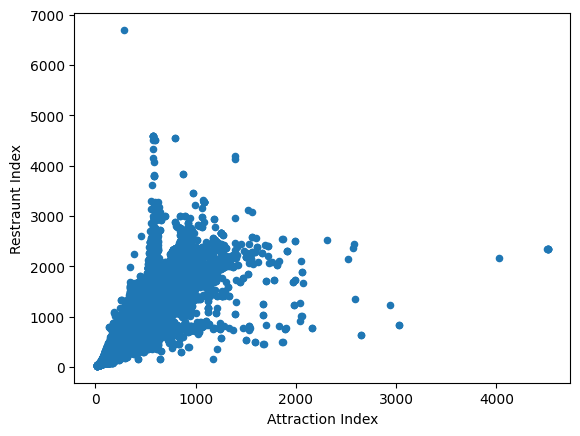

In [15]:
df.plot(kind='scatter', x='Attraction Index', y='Restraunt Index')

Text(0, 0.5, 'Frequency')

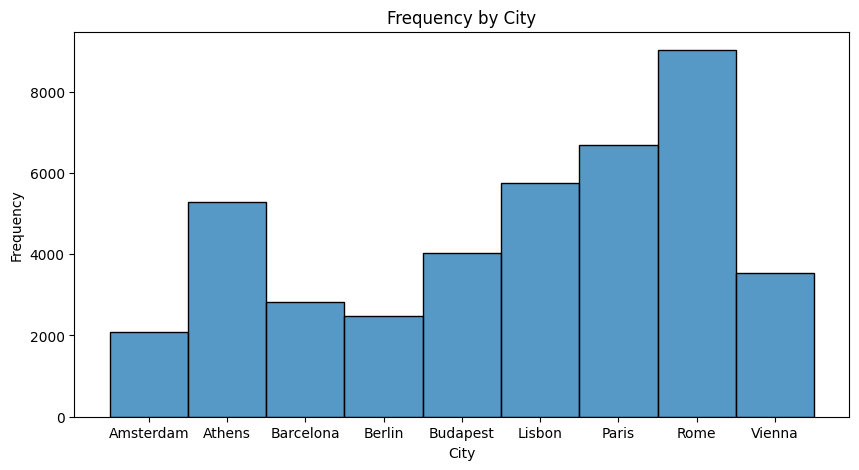

In [19]:
plt.figure(figsize=(10,5))
sb.histplot(df['City'])
plt.title('Frequency by City')
plt.xlabel('City')
plt.ylabel('Frequency')

<BarContainer object of 2 artists>

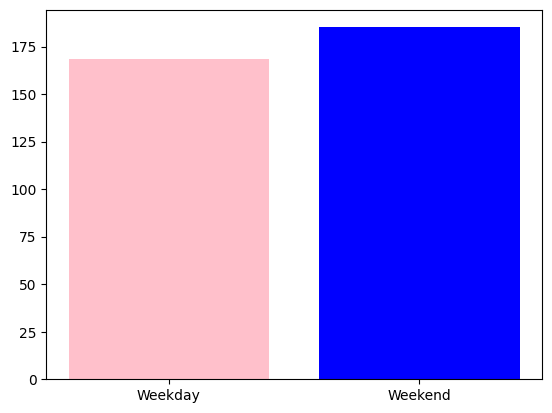

In [45]:
city_a = 'Budapest'
filtered = df[df['City'] == city_a]
avg_price_a = filtered.groupby('Day')['Price'].mean().reset_index()

catg_1 = avg_price_a['Day']
price_1 = avg_price_a["Price"]

plt.bar(catg_1, price_1, color=['pink', 'blue'])

In [47]:
df.head(20)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565
4,Amsterdam,485.552926,Weekday,Private room,False,True,2.0,True,0,0,10.0,98.0,1,0.544738,0.318693,552.830324,29.272733,815.305740,56.811677
5,Amsterdam,552.808567,Weekday,Private room,False,True,3.0,False,0,0,8.0,100.0,2,2.131420,1.904668,174.788957,9.255191,225.201662,15.692376
6,Amsterdam,215.124317,Weekday,Private room,False,True,2.0,False,0,0,10.0,94.0,1,1.881092,0.729747,200.167652,10.599010,242.765524,16.916251
7,Amsterdam,2771.307384,Weekday,Entire home/apt,False,False,4.0,True,0,0,10.0,100.0,3,1.686807,1.458404,208.808109,11.056528,272.313823,18.975219
8,Amsterdam,1001.804420,Weekday,Entire home/apt,False,False,4.0,False,0,0,9.0,96.0,2,3.719141,1.196112,106.226456,5.624761,133.876202,9.328686
9,Amsterdam,276.521454,Weekday,Private room,False,True,2.0,False,1,0,10.0,88.0,1,3.142361,0.924404,206.252862,10.921226,238.291258,16.604478


C:\Users\Admin\AppData\Local\Temp\ipykernel_12040\845320960.py:1: UserWarning: The palette list has more values (9) than needed (5), which may not be intended.
  sb.displot(df,


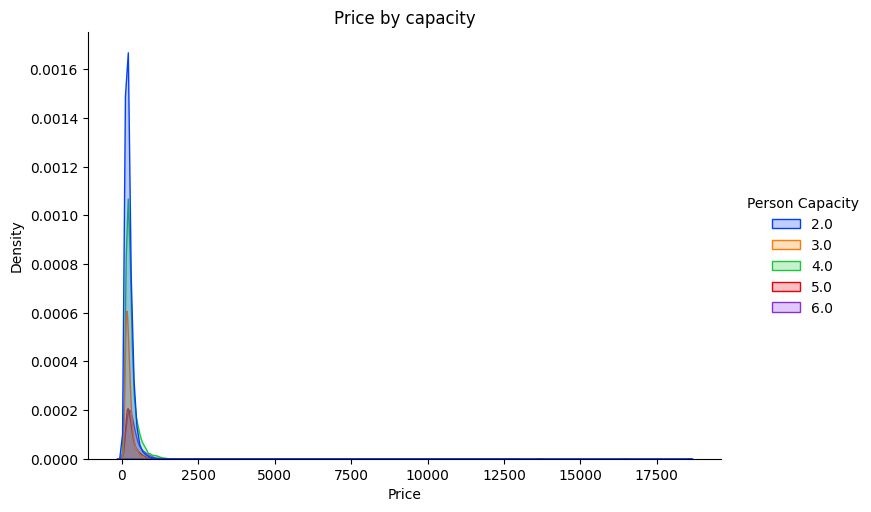

In [51]:
sb.displot(df, 
        x='Price', 
        hue='Person Capacity', 
        kind='kde', 
        fill=True, 
        palette=sb.color_palette('bright')[:9], 
        height=5, 
        aspect=1.5).set(title='Price by capacity')